In [0]:
# Essentially the strategy is thus:
# Sell when a short term average falls below a long term average (ie stock is declining)
# Buy when a short term average goes above a long term average (ie stock is increasing)
# With an overall upward trend in the long term stock you would theoretically make a return
# This is based off of the Dual Moving Average Crossover from Data Camp
'''This is meant as a very basic strategy for trading for me to be able to learn some of the analysis techniques and 
and likely would not perform as well as more thouroughly tested or monitored solutions in a real scenario. 
Additionally this is only performed on a small subset of data with substancial room for improvement but serves
as a refresher for me for some data visualization and analysis code in python.'''


'This is meant as a very basic strategy for trading for me to be able to learn some of the analysis techniques and \nand likely would not perform as well as more thouroughly tested or monitored solutions in a real scenario. \nAdditionally this is only performed on a small subset of data with substancial room for improvement but serves\nas a refresher for me for some data visualization and analysis code in python.'

In [0]:
# Import Libraries
import pandas as pd
#import csv
#import operator
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [119]:
# Load our data for use (This file was obtained from Kaggle)
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL (5).csv


In [120]:
# Store the data from our csv file
AAPL = pd.read_csv('AAPL (5).csv')

# Display the Data
AAPL # the data was from newest to oldest but i want the data from old to new so i changed the csv in excel and reuploaded

# failed attempts lol... remove later
#indexes = np.arange(0,6925) # flips the indexes since the data was in a funny order
#AAPL_sorted = AAPL.sort_values(by = 'Date', ascending = True).to_csv('AAPL_sorted.csv')
#AAPL_sorted = AAPL.reindex()
#AAPL_sorted.reindex(index = AAPL_sorted.index[::-1])
#new = pd.read_csv(AAPL_sorted)
#new
#with open('AAPL_sorted.csv', 'w') as f:
#  f.write(AAPL_sorted)

#files.download('AAPL_sorted.csv')

,Date,Open,High,Low,Close,Volume,Adj Close
0,07-09-1984,26.50,26.87,26.25,26.50,2981600,3.02
1,10-09-1984,26.50,26.62,25.87,26.37,2346400,3.01
2,11-09-1984,26.62,27.37,26.62,26.87,5444000,3.07
3,12-09-1984,26.87,27.00,26.12,26.12,4773600,2.98
4,13-09-1984,27.50,27.62,27.50,27.50,7429600,3.14
...,...,...,...,...,...,...,...
6948,26-03-2012,599.79,607.15,595.26,606.98,21259900,606.98
6949,27-03-2012,606.18,616.28,606.06,614.48,21628200,614.48
6950,28-03-2012,618.38,621.45,610.31,617.62,23385200,617.62
6951,29-03-2012,612.78,616.56,607.23,609.86,21668300,609.86


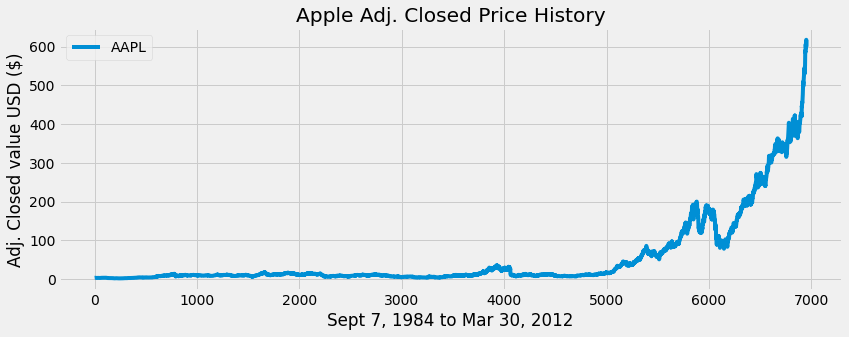

In [122]:
# Get a feel for the data 
plt.figure(figsize = (12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Closed Price History')
#plt.xlim(7000,0)
plt.xlabel('Sept 7, 1984 to Mar 30, 2012')
plt.ylabel('Adj. Closed value USD ($)')
plt.legend(loc='upper left')
plt.show()

In [183]:
# Create short term average 
# Use a simple moving average with a window of 30 days

SMA30 = pd.DataFrame() # create a data frame variable for the simple moving 30 day window average
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window = 40, ).mean() # take the mean over 30 days and assign that to the 'Adj Close' column in our data frame
SMA30 # view the data

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6948,528.11425
6949,532.15100
6950,536.17950
6951,540.02125


In [184]:
# Create another simple moving average (this will be the long term average)
# do this over 100 days
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window = 200).mean()
SMA100 # view this long term average 

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6948,413.6436
6949,415.0865
6950,416.5416
6951,417.9287


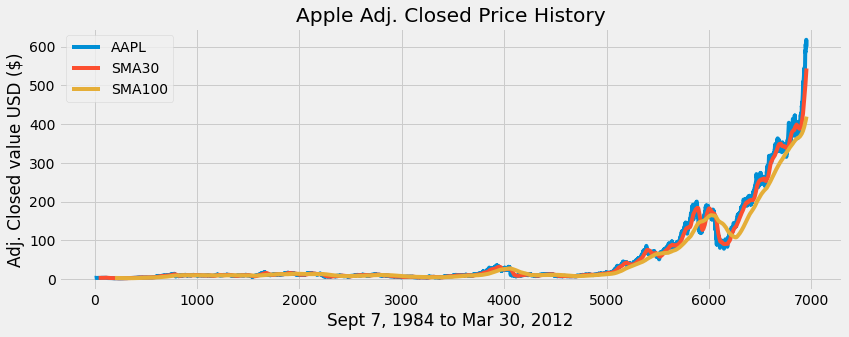

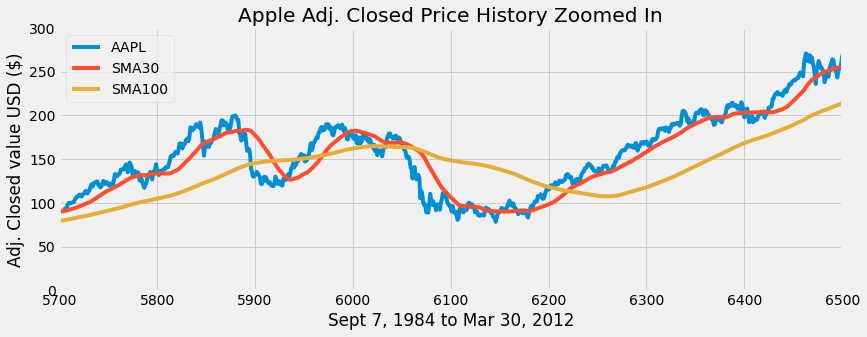

In [185]:
# Now to revisualize this data with the additional short term and long term means
# this is the entire plot
plt.figure(figsize = (12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Adj. Closed Price History')
#plt.xlim(7000,0)
plt.xlabel('Sept 7, 1984 to Mar 30, 2012')
plt.ylabel('Adj. Closed value USD ($)')
plt.legend(loc='upper left')
plt.show()

# I want to look at a smaller section to see some of the variations and get a clearer view
plt.figure(figsize = (12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Adj. Closed Price History Zoomed In')
plt.xlim(5700,6500)
plt.ylim(0, 300)
plt.xlabel('Sept 7, 1984 to Mar 30, 2012')
plt.ylabel('Adj. Closed value USD ($)')
plt.legend(loc='upper left')
plt.show()

In [186]:
# Creating a new data frame to store all the data of historically where the local average crosses the long term average
data = pd.DataFrame()
# create 3 columns to the data frame for AAPL, SMA30 and SMA100  
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data # take a look at data

,AAPL,SMA30,SMA100
0,3.02,NaN,NaN
1,3.01,NaN,NaN
2,3.07,NaN,NaN
3,2.98,NaN,NaN
4,3.14,NaN,NaN
...,...,...,...
6948,606.98,528.11425,413.6436
6949,614.48,532.15100,415.0865
6950,617.62,536.17950,416.5416
6951,609.86,540.02125,417.9287


In [0]:
# Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else: # dont add any values if nothing has changed
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return (sigPriceBuy, sigPriceSell)


In [0]:
# Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [189]:
# Show the data we have collected
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,3.02,NaN,NaN,NaN,NaN
1,3.01,NaN,NaN,NaN,NaN
2,3.07,NaN,NaN,NaN,NaN
3,2.98,NaN,NaN,NaN,NaN
4,3.14,NaN,NaN,NaN,NaN
...,...,...,...,...,...
6948,606.98,528.11425,413.6436,NaN,NaN
6949,614.48,532.15100,415.0865,NaN,NaN
6950,617.62,536.17950,416.5416,NaN,NaN
6951,609.86,540.02125,417.9287,NaN,NaN


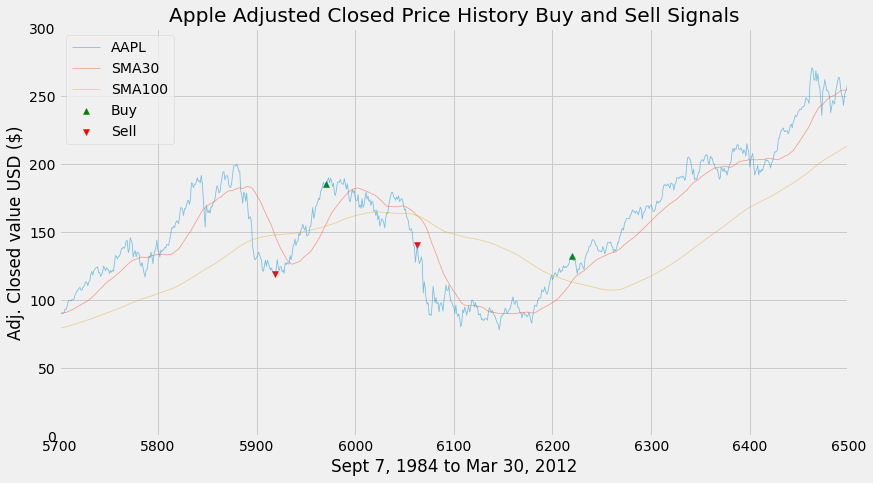

In [191]:
# Now visualize the data strategy to buy and sell the stock
plt.figure(figsize = (12.6, 7))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.5, lw = 0.8)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.5, lw = 0.8)
plt.plot(data['SMA100'], label = 'SMA100',alpha = 0.5, lw = 0.8)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^',color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v',color = 'red')
plt.title('Apple Adjusted Closed Price History Buy and Sell Signals')
plt.xlim(5700,6500)
plt.ylim(0, 300)
plt.xlabel('Sept 7, 1984 to Mar 30, 2012')
plt.ylabel('Adj. Closed value USD ($)')
plt.legend(loc='upper left')
plt.show()

This could be optimized more based on what values we choose for each of our moving averages since in the plot above we see that the we would definately lose money in some of the buy and sell scenarios due to lag in the intersections in the data.
